# <font color='red'>Depression, Axiety and Stress prediction</font>

## <font color='blue'>Introduction</font>

## Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.naive_bayes import GaussianNB

import function as fn

## <font color='blue'>Loading the dataframe</font>

In [2]:
data = fn.analysis_df()

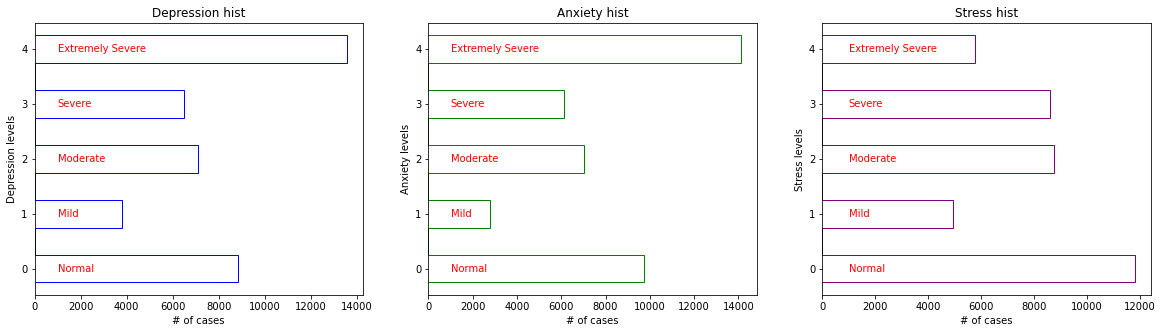

In [3]:
fn.show_data(data)

## <font color='blue'>Train and Test Dataframe</font>

In [4]:
# splits the training and test data set in 80% : 20%
X_train, X_test, Y_train, Y_test = fn.train_test_splitting(data,0.2)

X, Y train/test shape
(31820, 42)
(7955, 42)
(31820, 3)
(7955, 3)




## <font color='blue'>Linear Regression Classification</font>

The model performance for training set
--------------------------------------
RMSE is 0.4888746664746007
R2 score is 0.9000837310704531


The model performance for testing set
--------------------------------------
RMSE is 0.48788844240047335
R2 score is 0.8993837194195312


The best cuts and the performances
- Depression
0.42 0.718541797611565
- Anxiety
0.39 0.572972972972973
- Stress
0.41 0.8580766813324953


The model accuracy = 0.7385487813394792


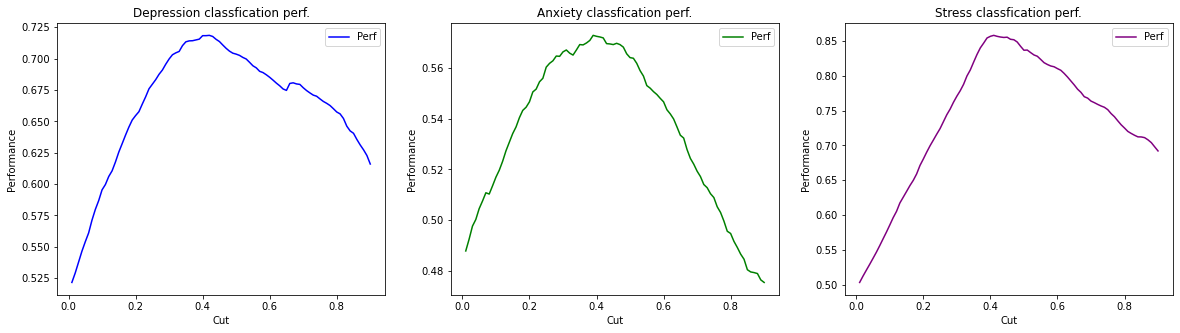

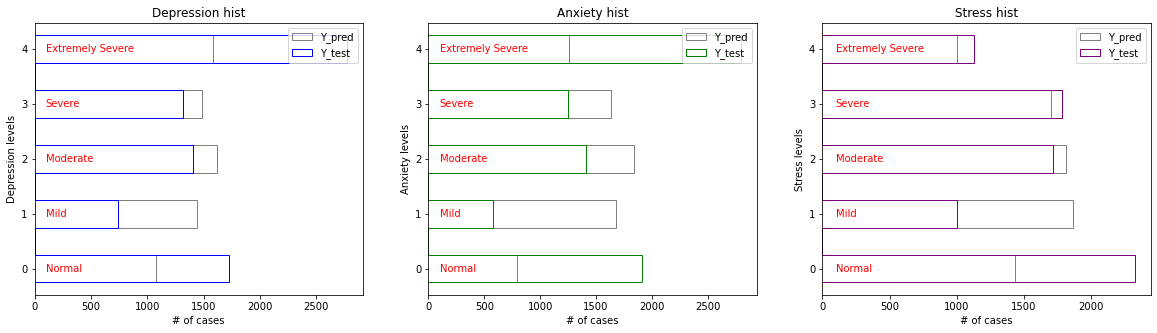

In [5]:
Y_pred_lin = fn.linear_regression(data,X_train,X_test,Y_train,Y_test)

## <font color='blue'>Gaussian Naive Bayes Classification</font>

* y_dep


The model performance for training set
--------------------------------------
RMSE is 0.545019158463622
R2 score is 0.8774745138104199


The model performance for testing set
--------------------------------------
RMSE is 0.5358311506423856
R2 score is 0.8806737126971457


0.7445631678189818
######################################


* y_anx


The model performance for training set
--------------------------------------
RMSE is 0.7067733712908316
R2 score is 0.8029411734739939


The model performance for testing set
--------------------------------------
RMSE is 0.6973055802742324
R2 score is 0.8057473345792969


0.6612193588937775
######################################


* y_sts


The model performance for training set
--------------------------------------
RMSE is 0.5878510224866433
R2 score is 0.8324290748606094


The model performance for testing set
--------------------------------------
RMSE is 0.5952884358108952
R2 score is 0.8268098623071236


0.7038340666247643
#######

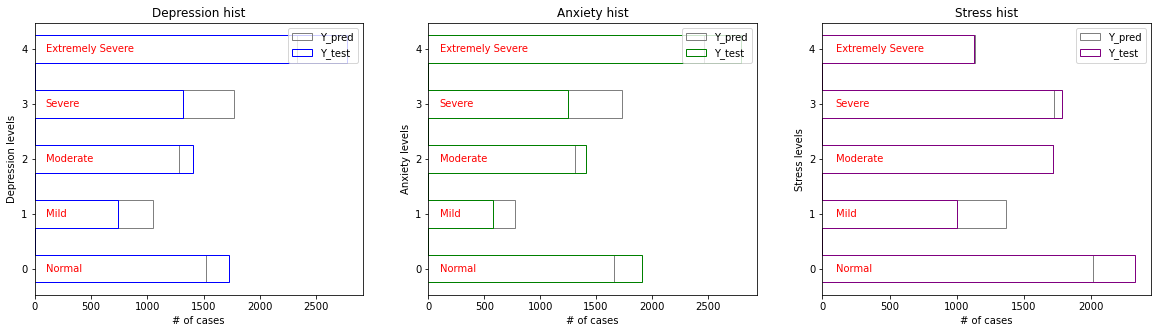

In [6]:
Y_pred_GBN = fn.GNB_classification(X_train, X_test, Y_train, Y_test)

## <font color='blue'>Logistic Regression Classification</font>

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
def index_q():
    index_question = []
    for i in range(42):
        index_question.append('Q'+str(i+1)+'A')
            
    return index_question

def train_test_splitting(data,percent):
    # creating the X and Y dataframes
    X = data[index_q()]
    Y = data[['y_dep','y_anx','y_sts']]
    
    # splits the training and test data set in 80% : 20%
    # assign random_state to any value.This ensures consistency.
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = percent, random_state=5)
    print('X, Y train/test shape')
    print(X_train.shape)
    print(X_test.shape)
    print(Y_train.shape)
    print(Y_test.shape)
    print("\n")
    
    return X_train, X_test, Y_train, Y_test

def logistic_classification(data):
    # splitting train and test set
    X_train, X_test, Y_train, Y_test = train_test_splitting(data,0.2)
    # creating the logistic_classification model
    logreg = LogisticRegression(C=500,tol=500,solver = 'lbfgs',multi_class='multinomial',max_iter=4000)
    y_pat = ['y_dep','y_anx','y_sts']
    acc = []
    Y_pred = pd.DataFrame()
    for i in range(1):
        logreg.fit(X_train, np.ravel(Y_train[[y_pat[i]]])) # using ravel in order to pass a 1D array (not a 1D colum)
        print(logreg.n_iter_)
        
         # model evaluation for training set

        y_train_predict = logreg.predict(X_train)
        rmse = (np.sqrt(mean_squared_error(Y_train[[y_pat[i]]], y_train_predict)))
        r2 = r2_score(Y_train[[y_pat[i]]], y_train_predict)

        print("The model performance for training set")
        print("--------------------------------------")
        print('RMSE is {}'.format(rmse))
        print('R2 score is {}'.format(r2))
        print("\n")

        # model evaluation for testing set

        y_test_predict = logreg.predict(X_test)
        # root mean square error of the model
        rmse = (np.sqrt(mean_squared_error(Y_test[[y_pat[i]]], y_test_predict)))

        # r-squared score of the model
        r2 = r2_score(Y_test[[y_pat[i]]], y_test_predict)

        print("The model performance for testing set")
        print("--------------------------------------")
        print('RMSE is {}'.format(rmse))
        print('R2 score is {}'.format(r2))
        print("\n")
        prediction = logreg.predict(X_test)
        Y_pred.insert(i,y_pat[i],prediction)
        acc.append(accuracy_score(Y_test[[y_pat[i]]],Y_pred[[y_pat[i]]]))
        print(acc[i])
    
    print(f"The model accuracy = {sum(acc)/len(acc)}")
    
    return Y_pred , Y_test

In [ ]:
Y_pred , Y_test = logistic_classification(data)

In [ ]:
fig, ax2 = plt.subplots(nrows=1, ncols=3,figsize=(20,5))
    
#plotting results
patology = ['Depression','Anxiety','Stress']
pat_index = ['y_dep','y_anx','y_sts']
col = ['b','g','purple']
    
# plotting in each subplot
for i in range(3):
    ax2[i].hist(Y_pred_GBN[pat_index[i]],range=(0,4.5),bins=9,\
                        histtype='step',orientation='horizontal',align='left',color='grey',label='Y_pred')
    ax2[i].hist(Y_test[pat_index[i]],range=(0,4.5),bins=9,\
                            histtype='step',orientation='horizontal',align='left',color=col[i],label='Y_test')
    ax2[i].set_xlabel('# of cases')
    ax2[i].set_ylabel(patology[i]+' levels')
    ax2[i].set_title(patology[i]+' hist')
    ax2[i].text(100, -0.05, 'Normal', c='r')
    ax2[i].text(100, 0.95, 'Mild', c='r')
    ax2[i].text(100, 1.95, 'Moderate', c='r')
    ax2[i].text(100, 2.95, 'Severe', c='r')
    ax2[i].text(100, 3.95, 'Extremely Severe', c='r')
    ax2[i].legend()

plt.show()